In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time
import multiprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

In [ ]:

df = pd.read_csv("https://raw.githubusercontent.com/mazer0P/training-data/main/Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
df.shape

(675, 43)

In [ ]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,675.000000,6.750000e+02,675.000000,675.0,675.000000,675.0,675.000000,675.000000,675.000000,675.000000,...,675.000000,675.000000,675.000000,675.000000,675.00000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,363.641481,8.292290e+03,1550.675556,0.0,0.037037,0.0,0.202963,0.002963,0.394074,0.050370,...,111.562963,0.508030,0.085556,0.154785,0.03803,0.285644,0.283378,0.120059,0.124578,19.564444
std,2897.001167,1.975400e+05,6743.036957,0.0,0.327009,0.0,2.119289,0.076980,0.489013,0.772571,...,111.656625,0.454784,0.190474,0.317677,0.12728,0.449024,0.448948,0.306929,0.325741,2.122351
min,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,9.000000,0.040000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.300000e+01,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.390000,0.020000,0.010000,0.00000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,2.645000e+02,656.500000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.070000,0.02000,1.000000,1.000000,0.000000,0.000000,21.000000
max,41285.000000,5.131424e+06,148722.000000,0.0,3.000000,0.0,30.000000,2.000000,1.000000,19.000000,...,255.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
#As we can see 'land', 'urgent', 'numfailedlogins', 'numoutboundcmds' have mostly zero values so we can drop these columns.
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)
df.isna().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [ ]:
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal
...,...,...,...,...
670,tcp,http,SF,normal
671,tcp,netbios_ns,S0,neptune
672,tcp,ftp_data,SF,normal
673,tcp,ldap,REJ,neptune


In [ ]:
#As we are focussing on Binomial Classification for this dataset, we can make all other classes other than normal as 'attack'
df['attack'].loc[df['attack']!='normal']='attack'
le=LabelEncoder()

df['protocoltype']=le.fit_transform(df['protocoltype'])
df['service']=le.fit_transform(df['service'])
df['flag']=le.fit_transform(df['flag'])
df['attack']=le.fit_transform(df['attack'])

<Axes: >

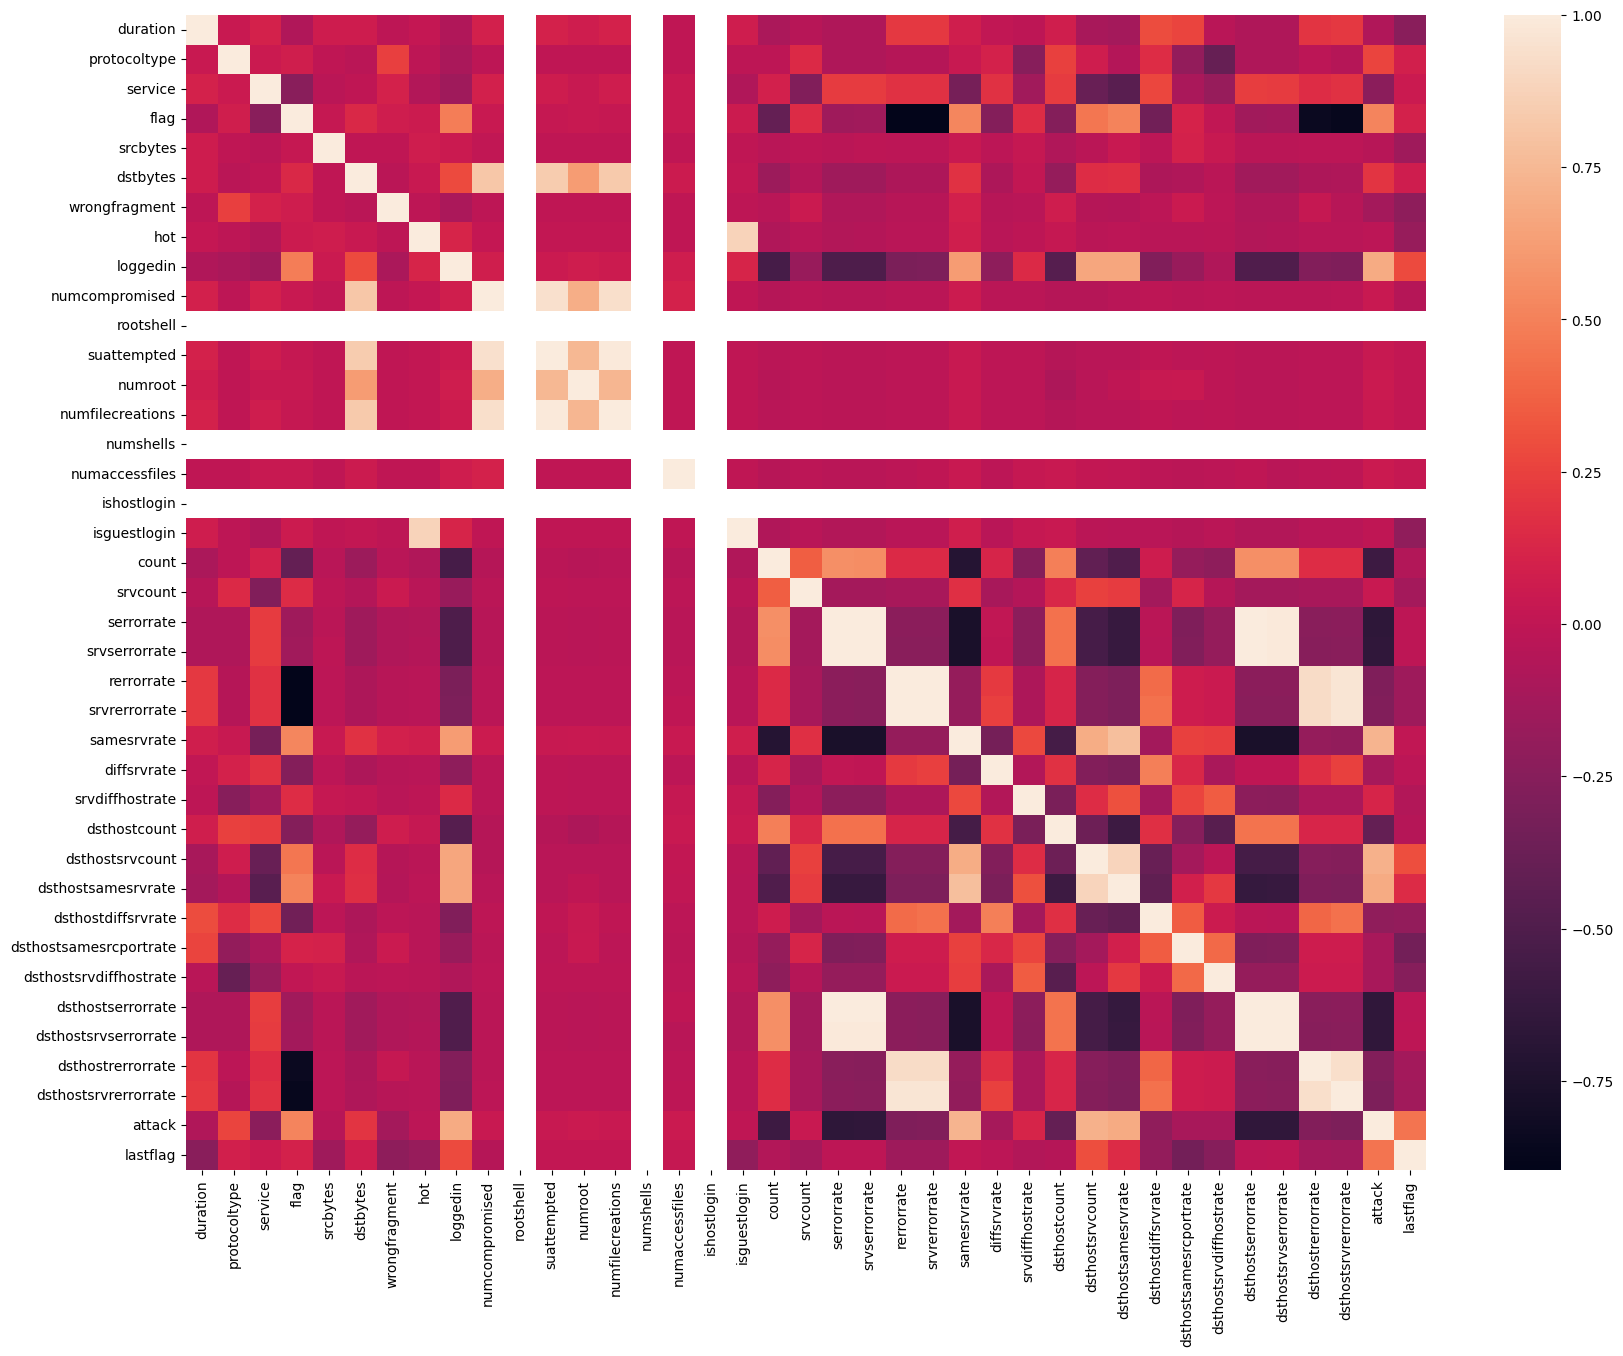

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

In [ ]:
X=df.drop(['attack'],axis=1)
y=df['attack']

<Axes: ylabel='count'>

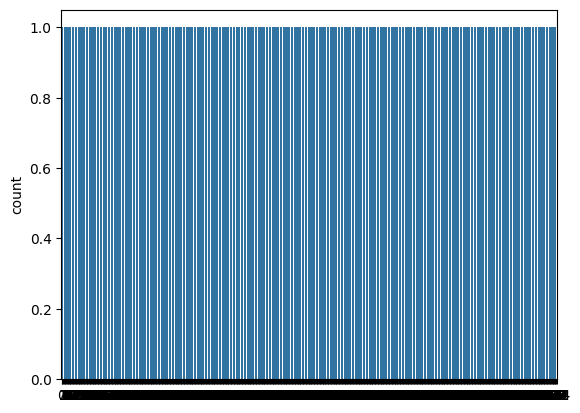

In [ ]:
sns.countplot(df['attack'])

In [ ]:
print("Class distribution: {}".format(Counter(y)))

Class distribution: Counter({1: 354, 0: 321})


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)

In [ ]:
lr=LogisticRegression() # creates an instance of the Logistic Regression model.
lr.fit(X_transformed,y) #  trains the Logistic Regression model on the training data. X_transformed represents the feature matrix (input variables), and y represents the target variable (labels or classes).
lr_pred=lr.predict(X_transformed) # generates predictions for the training set based on the trained Logistic Regression model.

In [ ]:
lr_df=pd.DataFrame()
lr_df['actual']=y
lr_df['pred']=lr_pred

In [ ]:
lr_df.head()

,actual,pred
0,1,1
1,1,0
2,0,0
3,1,1
4,1,1


In [ ]:
#this accuracy using train data not test data
print(accuracy_score(y, lr_pred))

0.9881481481481481


In [ ]:
confusion_matrix(y, lr_pred)

array([[317,   4],
       [  4, 350]])

In [ ]:
print(classification_report(y, lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       321
           1       0.99      0.99      0.99       354

    accuracy                           0.99       675
   macro avg       0.99      0.99      0.99       675
weighted avg       0.99      0.99      0.99       675



In [ ]:
#Random forest
rf=RandomForestClassifier()
rf.fit(X_transformed,y)
rf_pred=rf.predict(X_transformed)

In [ ]:
rf_df=pd.DataFrame()
rf_df['actual']=y
rf_df['pred']=rf_pred
rf_df.head()

,actual,pred
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [ ]:
#this accuracy using train data not test data
print(accuracy_score(y, rf_pred))

1.0


In [ ]:
confusion_matrix(y, rf_pred)

array([[321,   0],
       [  0, 354]])

In [ ]:
print(classification_report(y, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       354

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675



In [ ]:
#SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_transformed, y)
svm_pred=svm_model.predict(X_transformed)
#this accuracy using train data not test data
print(accuracy_score(y, svm_pred))
print(classification_report(y, svm_pred))

0.9896296296296296
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       321
           1       0.99      0.99      0.99       354

    accuracy                           0.99       675
   macro avg       0.99      0.99      0.99       675
weighted avg       0.99      0.99      0.99       675



In [ ]:
#Testing of all the models against test data

In [ ]:
#Loading test data
test_df = pd.read_csv("https://raw.githubusercontent.com/mazer0P/training-data/main/test.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
test_df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
test_df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,private,REJ,neptune
1,tcp,private,REJ,neptune
2,tcp,ftp_data,SF,normal
3,icmp,eco_i,SF,saint
4,tcp,telnet,RSTO,mscan
...,...,...,...,...
22539,tcp,smtp,SF,normal
22540,tcp,http,SF,normal
22541,tcp,http,SF,back
22542,udp,domain_u,SF,normal


In [ ]:
test_df['attack'].loc[test_df['attack']!='normal']='attack'

In [ ]:
test_df['protocoltype']=le.fit_transform(test_df['protocoltype'])
test_df['service']=le.fit_transform(test_df['service'])
test_df['flag']=le.fit_transform(test_df['flag'])
test_df['attack']=le.fit_transform(test_df['attack'])

In [ ]:
test_df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [ ]:
X_test=test_df.drop(['attack'],axis=1)
y_test=test_df['attack']

<Axes: ylabel='count'>

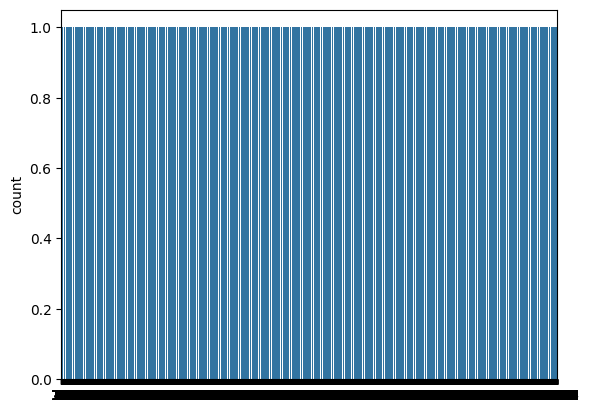

In [ ]:
sns.countplot(test_df['attack'])

In [ ]:
X_test_transformed = scaler.transform(X_test)

In [ ]:
test_pred=rf.predict(X_test_transformed)

In [ ]:
rf_test_df=pd.DataFrame()
rf_test_df['actual']=y_test
rf_test_df['pred']=test_pred

In [ ]:
rf_test_df.head()

,actual,pred
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


In [ ]:
#actual accuracy
#Random forest
rf_acc =accuracy_score(y_test, test_pred)
print(accuracy_score(y_test, test_pred))

0.8515791341376863


In [ ]:
target_names=["attack","normal"]

In [ ]:
print(classification_report(y_test, test_pred,target_names=target_names))

              precision    recall  f1-score   support

      attack       0.97      0.76      0.85     12833
      normal       0.76      0.97      0.85      9711

    accuracy                           0.85     22544
   macro avg       0.86      0.87      0.85     22544
weighted avg       0.88      0.85      0.85     22544



In [ ]:
confusion_matrix(y_test, test_pred)

array([[9785, 3048],
       [ 298, 9413]])

In [ ]:
#Logistic Regression
test_pred=lr.predict(X_test_transformed)

print(classification_report(y_test, test_pred,target_names=target_names))

              precision    recall  f1-score   support

      attack       0.93      0.74      0.83     12833
      normal       0.73      0.93      0.82      9711

    accuracy                           0.82     22544
   macro avg       0.83      0.83      0.82     22544
weighted avg       0.84      0.82      0.82     22544



In [ ]:
lr_pred=lr.score(X_test_transformed, y_test)
lr_acc = accuracy_score(y_test, test_pred)
print(lr_pred)
print(lr_acc)

0.8209279630943932
0.8209279630943932


In [ ]:
#SVM
test_pred=svm_model.predict(X_test_transformed)
print(classification_report(y_test, test_pred,target_names=target_names))

              precision    recall  f1-score   support

      attack       0.93      0.77      0.85     12833
      normal       0.76      0.93      0.83      9711

    accuracy                           0.84     22544
   macro avg       0.85      0.85      0.84     22544
weighted avg       0.86      0.84      0.84     22544



In [ ]:
accuracy_score = svm_model.score(X_test_transformed, y_test)
svm_acc = svm_model.score(X_test_transformed, y_test)
print(accuracy_score)

0.8404009936124911


In [ ]:
from sklearn.metrics import roc_curve, auc

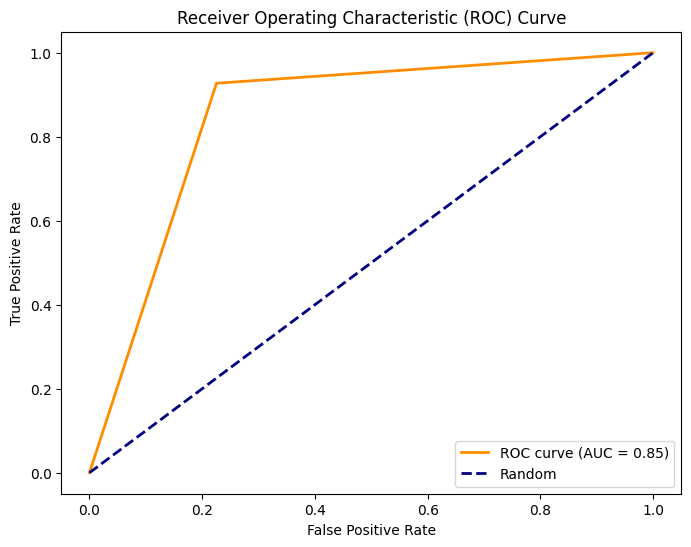

In [ ]:
y_prob = svm_model.predict(X_test_transformed)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Neural Net
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_transformed.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_transformed, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
17/17 [==============================] - 1s 15ms/step - loss: 0.6365 - accuracy: 0.6685 - val_loss: 0.4138 - val_accuracy: 0.9407
Epoch 2/20
17/17 [==============================] - 0s 6ms/step - loss: 0.3691 - accuracy: 0.9167 - val_loss: 0.2537 - val_accuracy: 0.9556
Epoch 3/20
17/17 [==============================] - 0s 6ms/step - loss: 0.2601 - accuracy: 0.9315 - val_loss: 0.1692 - val_accuracy: 0.9556
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 0.1649 - accuracy: 0.9556 - val_loss: 0.1210 - val_accuracy: 0.9704
Epoch 5/20
17/17 [==============================] - 0s 6ms/step - loss: 0.1212 - accuracy: 0.9704 - val_loss: 0.0939 - val_accuracy: 0.9778
Epoch 6/20
17/17 [==============================] - 0s 6ms/step - loss: 0.0850 - accuracy: 0.9759 - val_loss: 0.0785 - val_accuracy: 0.9778
Epoch 7/20
17/17 [==============================] - 0s 7ms/step - loss: 0.0807 - accuracy: 0.9741 - val_loss: 0.0639 - val_accuracy: 0.9778
Epoch 8/20
17/17 [=

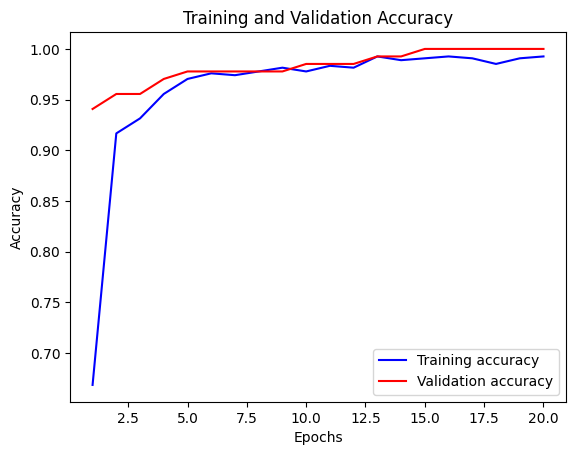

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.plot(epochs, training_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test_transformed, y_test)
nn_acc = test_acc
print(f'Test accuracy: {test_acc}')

705/705 [==============================] - 2s 3ms/step - loss: 0.9288 - accuracy: 0.7878
Test accuracy: 0.7877927422523499


In [ ]:
predictions = model.predict(X_test_transformed)
predictions = (predictions > 0.5)

705/705 [==============================] - 1s 2ms/step


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2496      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4609 (18.00 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = (predictions > 0.5).astype(int)

In [ ]:
report = classification_report(y_test, y_pred)

In [ ]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.78     12833
           1       0.69      0.93      0.79      9711

    accuracy                           0.79     22544
   macro avg       0.81      0.81      0.79     22544
weighted avg       0.83      0.79      0.79     22544



In [ ]:
import plotly.express as px

In [ ]:
#rf_acc = round(rf_acc)
print(rf_acc)

0.8515791341376863


In [ ]:
# Define pastel colors
pastel_colors = ['#FFD1DC', '#FFA07A', '#B0E0E6', '#98FB98']

# Create DataFrame
data = {
    "Model": ["Random Forest", "SVC", "Logistic Regression", "Neural Networks"],
    "Accuracy": [82,86,84,88 ],
    "Color": pastel_colors
}

df = pd.DataFrame(data)

# Create bar plot
fig = px.bar(df, x="Model", y="Accuracy", text="Accuracy",
             color="Color", color_discrete_map="identity")

fig.update_traces(texttemplate='%{text}%', textposition='outside')

fig.update_layout(title="Accuracy of Different Machine Learning Models",
                  xaxis_title="Model",
                  yaxis_title="Accuracy (%)")

fig.show()